# Sentiment Analysis using Logistic Regression and Naive Bayes

## Preprocessing

In [17]:
## importing libraries
import nltk                                
from nltk.corpus import twitter_samples   
import matplotlib.pyplot as plt            
import random    
import numpy as np
import re                                  
import string                              
# nltk.download('stopwords')
from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer  

### About the dataset

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly.  


In [18]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')
## selecting positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


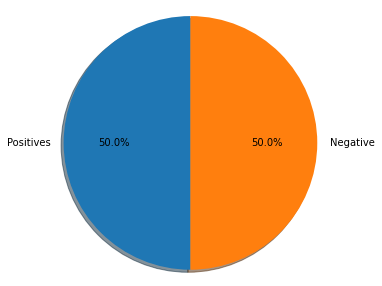

In [19]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
## reporting the number
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))
print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

## displaying the piechart of the numbers
fig = plt.figure(figsize=(5, 5))
labels = 'Positives', 'Negative'
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  
plt.show()


In [20]:
# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg
## creating labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


### Preprocessing raw text for Sentiment analysis

Task:
* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming


In [21]:
## Printing example tweets
tweet=all_positive_tweets[2277]
print(f'Positive tweet (w/o preprocessing) : {all_positive_tweets[2000]}')
print(f'Negative tweet (w/o preprocessing) : {all_negative_tweets[2000]}')
print()
## Removing hyperlinks, twitter marks and styles
print(tweet)
print()
# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)
# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)
# remove hashtags
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

Positive tweet (w/o preprocessing) : @jayyycgee Well you're about to get recruited to Team Doom. So The Nasty Crew is going to be affiliated. &gt;:)
Negative tweet (w/o preprocessing) : @stormieraae what the heck :( you don't follow her?

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenize the string

To tokenize means to split the strings into individual words without blanks or tabs.

In [22]:
print(tweet2)
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)
print()
print('Tokenized string:')
print(tweet_tokens)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


Remove stop words and punctuations

In [23]:
#Import the english stop words list from NLTK
nltk.download('stopwords')
stopwords_english = stopwords.words('english') 

print(f'Stop words: {stopwords_english}')
print(f'Punctuation: {string.punctuation}')
print()
# print(tweet_tokens)

tweets_clean = []
for word in tweet_tokens: 
    if (word not in stopwords_english and word not in string.punctuation):  
        tweets_clean.append(word)
print()
print('removed stop words and punctuation:')
print(tweets_clean)

Stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Please note that the words **happy** and **sunny** in this list are correctly spelled. 

Stemming: \
Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

In [24]:
print(tweets_clean)
# Instantiate stemming class
stemmer = PorterStemmer() 
tweets_stem = [] 
for word in tweets_clean:
    stem_word = stemmer.stem(word) 
    tweets_stem.append(stem_word)
print('stemmed words:')
print(tweets_stem)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']
stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [24]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)
# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

#test the function below
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

type(freqs) = <class 'dict'>
len(freqs) = 11428
This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


## Logistic Regression Implementation

### Helper Functions

In [25]:
def build_freqs(tweets, ys):
  
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

def extract_features(tweet, freqs):
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    # loop through each word in the list of words
    for word in word_l:     
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)    
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)
    assert(x.shape == (1, 3))
    return x

In [26]:
def sigmoid(z): 
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))
    return h
  
def gradientDescent(x, y, theta, alpha, num_iters):
    m = x.shape[0]
    for i in range(0, num_iters): 
        z = np.dot(x,theta)      
        # get the sigmoid of z
        h = sigmoid(z)
        # calculate the cost function
        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))    
        # update the weights theta
        theta = theta = theta - (alpha/m) * np.dot(x.transpose(),(h-y))
    J = float(J)
    return J, theta

# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.22521260.
The resulting vector of weights is [6e-08, 0.0005382, -0.0005583]


### Testing the predictions

In [27]:
def predict_tweet(tweet, freqs, theta):
    x = extract_features(tweet,freqs)
    y_pred = sigmoid(np.dot(x,theta))
    
    return y_pred

def test_logistic_regression(test_x, test_y, freqs, theta):
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)
    return accuracy

tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy*100:.2f}")
# Feel free to change the tweet below
my_tweet = 'Sad to hear that'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

Logistic regression model's accuracy = 99.50
['sad', 'hear']
[[0.4863188]]
Negative sentiment


## Naive Bayes Implementation

In [28]:
## importing the required librairies
import pdb
from nltk.corpus import stopwords, twitter_samples
import numpy as np
import pandas as pd
import nltk
import string
from nltk.tokenize import TweetTokenizer
from os import getcwd
nltk.download('stopwords')
nltk.download('twitter_samples')

# get the sets of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# split the data into two pieces, one for training and one for testing (validation set)
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000] 
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

# avoid assumptions about the length of all_positive_tweets
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


### Helper functions

In [29]:
def train_naive_bayes(freqs, train_x, train_y):
    loglikelihood = {}
    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)
    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:
            N_pos += freqs.get(pair, 1)
        else:
            N_neg += freqs.get(pair, 1)
    D = len(train_y)
    D_pos = sum(train_y)
    D_neg = D-D_pos
    # Calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)
    for word in vocab:
        freq_pos = freqs.get((word, 1),0)
        freq_neg = freqs.get((word, 0),0)
        p_w_pos = (freq_pos + 1)/(N_pos + V)
        p_w_neg = (freq_neg + 1)/(N_neg + V)
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)
    return logprior, loglikelihood

def count_tweets(result, tweets, ys):
    for y, tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            pair = (word,y)
            if pair in result:
                result[pair] += 1
            else:
                result[pair] = 1

    return result

In [30]:
result = {}
tweets = ['i am happy', 'i am tricked', 'i am sad', 'i am tired', 'i am tired']
ys = [1, 0, 0, 0, 0]
count_tweets(result, tweets, ys)

{('happi', 1): 1, ('sad', 0): 1, ('tire', 0): 2, ('trick', 0): 1}

In [31]:
freqs = count_tweets({}, train_x, train_y)
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.0
7570


### Testing the predictions

In [32]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
   
    # process the tweet to get a list of words
    word_l = process_tweet(tweet)
# initialize probability to zero
    p = 0
# add the logprior
    p += logprior
    for word in word_l:
    # check if the word exists in the loglikelihood dictionary
            if word in loglikelihood:
                # add the log likelihood of that word to the probability
                p += loglikelihood[word]
    return p
def test_naive_bayes(test_x, test_y, logprior, loglikelihood):
    accuracy = 0
    y_hats = []
    for tweet in test_x:
        # if the prediction is > 0
        if naive_bayes_predict(tweet, logprior, loglikelihood) > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            y_hat_i = 0
        y_hats.append(y_hat_i)
    
    error = np.mean(np.absolute(y_hats - test_y))
    accuracy = 1 - error
    return accuracy

In [33]:
my_tweet = 'This is awful.'
p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print('The expected output is', p)

The expected output is -2.440207463180464


In [34]:
# pred=naive_bayes_predict(logprior,loglikelihood)
accuracy_naive = test_naive_bayes(test_x, test_y, logprior, loglikelihood)
print(f"Naive bayes model's accuracy = {accuracy_naive*100:.2f}%")
# Feel free to change the tweet below
my_tweet = 'I am not happy but sad'
print(process_tweet(my_tweet))
yHat = naive_bayes_predict(my_tweet,logprior,loglikelihood)
print(yHat)
if yHat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

Naive bayes model's accuracy = 99.45%
['happi', 'sad']
-0.7813332638545585
Negative sentiment
